In [3]:
local_data_dir = '/Users/shanydanieli/projects/merian/observing/data/'

In [212]:
import numpy as np
import healpy as hp

import matplotlib.pyplot as plt
from matplotlib import patches

from astropy import coordinates
from astropy import units as u
from astropy.io import fits

from shapely import geometry
from shapely.ops import unary_union
from shapely.geometry import Point
from descartes.patch import PolygonPatch


from skipper import shape, hsc

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
def get_concave_shape(ra, dec, ralow, raup, alpha):
    ra_chosen = [x for x in ra if ralow<x<raup]
    dec_chosen = [dec[i] for i in range(len(dec)) if ralow<ra[i]<raup]
    coor = np.vstack((ra_chosen,dec_chosen)).T
    field_edges = shape.concave_hull(coor, alpha=alpha)
    return field_edges


## Plot the HSC PDR2 footprint, HSC S20A regions, SAGA pointings, and regions observarble in May with Baade

### HSC-SSP PDR2 (S18A)

In [211]:
mask = hp.read_map(local_data_dir+'s18a_fdfc_hp_contarea.fits', nest=True, dtype = np.bool)
indices_map = np.where(mask)[0]
nside = hp.get_nside(mask)

In [253]:
# Read the random catalog in the i-band only
hdul = fits.open(local_data_dir+'/merian_random_iband_only_1.fits')
randoms_data = hdul[1].data

filtered_catalog = hsc.filter_healpix_mask(mask,randoms_data)
ra_s18a = filtered_catalog['ra']
dec_s18a = filtered_catalog['dec']

# gama_edges1_S18A = get_concave_shape(ra_s18a, dec_s18a, 0, 10, alpha=1)
# gama_edges2_S18A = get_concave_shape(ra_s18a, dec_s18a, 15, 50, alpha=1)
# gama_edges3_S18A = get_concave_shape(ra_s18a, dec_s18a, 120, 153, alpha=1)
# gama_edges4_S18A = get_concave_shape(ra_s18a, dec_s18a, 153.5, 250, alpha=1)
# gama_edges5_S18A = get_concave_shape(ra_s18a, dec_s18a, 300, 360, alpha=1)

# np.savetxt('../data/gama_edges1_S18A.dat', gama_edges1_S18A)
# np.savetxt('../data/gama_edges2_S18A.dat', gama_edges2_S18A)
# np.savetxt('../data/gama_edges3_S18A.dat', gama_edges3_S18A)
# np.savetxt('../data/gama_edges4_S18A.dat', gama_edges4_S18A)
# np.savetxt('../data/gama_edges5_S18A.dat', gama_edges5_S18A)

# 11127341/42406457 objects are selected by the mask


### HSC-SSP S20A

In [109]:
HSC_S20_fdfc = hp.read_map('../data/s20a_fdfc_hp_contarea_izy-gt-5.fits', nest=True, dtype=np.bool)
filtered_catalog = hsc.filter_healpix_mask(HSC_S20_fdfc,randoms_data)
ra_s20a = filtered_catalog['ra']
dec_s20a = filtered_catalog['dec']

# gama_edges1 = get_concave_shape(ra_s20a, dec_s20a, 0, 10, alpha=1)
# gama_edges2 = get_concave_shape(ra_s20a, dec_s20a, 15, 50, alpha=1)
# gama_edges3 = get_concave_shape(ra_s20a, dec_s20a, 120, 153, alpha=1)
# gama_edges4 = get_concave_shape(ra_s20a, dec_s20a, 153.5, 250, alpha=1)
# gama_edges5 = get_concave_shape(ra_s20a, dec_s20a, 300, 360, alpha=1)

np.savetxt('../data/gama_edges1_S20A.dat', gama_edges1)
np.savetxt('../data/gama_edges2_S20A.dat', gama_edges2)
np.savetxt('../data/gama_edges3_S20A.dat', gama_edges3)
np.savetxt('../data/gama_edges4_S20A.dat', gama_edges4)
np.savetxt('../data/gama_edges5_S20A.dat', gama_edges5)

# 19827548/42406457 objects are selected by the mask


### read in SAGA pointings

In [178]:
hostID, ra_saga, dec_saga, complete = np.genfromtxt(local_data_dir+'SAGA_hostcenters.dat',skip_header=1,usecols=(0,1,2,3),unpack=True, dtype='S5')

complete = complete.astype(int)
ra_saga = ra_saga.astype(float)
dec_saga = dec_saga.astype(float)
hostID = [x.decode("utf-8") for x in hostID]

ra_saga_complete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]>0]
dec_saga_complete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]>0]

ra_saga_notcomplete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]<1]
dec_saga_notcomplete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]<1]


### observable in May with Baade

In [122]:
ralow_may_baade1 = 260
rahigh_may_baade1 = 285
rahigh_may_baade2 = 250
rahigh_may_baade2 = 300

In [193]:
plt.rcParams['font.size'] = 25

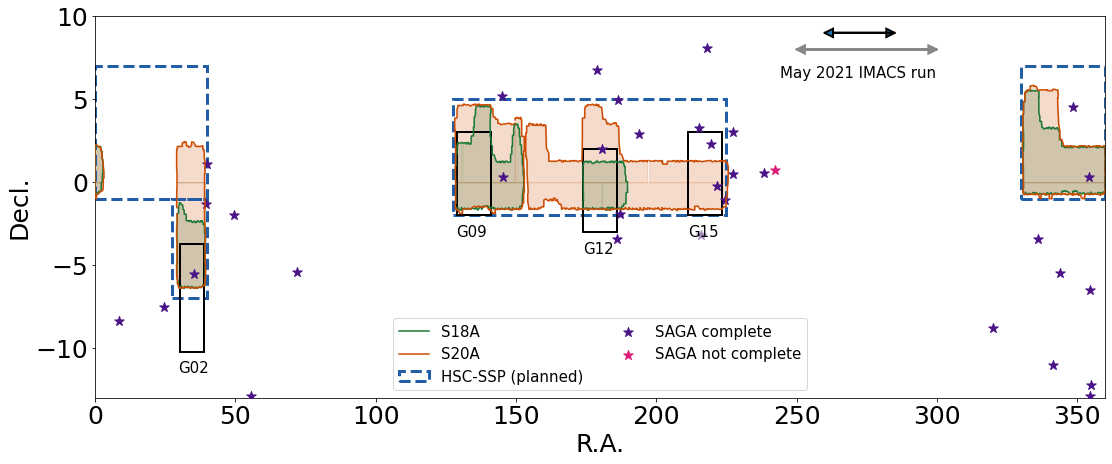

In [277]:
fig = plt.figure(1, figsize=(16,7))
plt.xlabel('R.A.')
plt.ylabel('Decl.')

# HSC-SSP original fields
hscssp_fall1 = patches.Rectangle((330,-1.0),width=30, height=8,linewidth=3,edgecolor='#225ea8',facecolor='none', ls='--', label='HSC-SSP (planned)')
plt.gca().add_patch(hscssp_fall1)
hscssp_fall2 = patches.Rectangle((0,-1.0),width=40, height=8,linewidth=3,edgecolor='#225ea8',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_fall2)
hscssp_fall3 = patches.Rectangle((27.5,-7.0),width=12.5, height=6,linewidth=3,edgecolor='#225ea8',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_fall3)
hscssp_spring = patches.Rectangle((127.5,-2.0),width=97.5, height=7,linewidth=3,edgecolor='#225ea8',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_spring)


# SAGA
plt.scatter(ra_saga_complete,dec_saga_complete, s=100, marker='*', color='#4a1486', zorder=20, label='SAGA complete')
plt.scatter(ra_saga_notcomplete,dec_saga_notcomplete, s=100, marker='*', color='#dd1c77', zorder=20, label='SAGA not complete')

ra_saga_complete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]>0]
dec_saga_complete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]>0]

ra_saga_notcomplete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]<1]
dec_saga_notcomplete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]<1]

#S18A
plt.plot(gama_edges1_S18A[:,0],gama_edges1_S18A[:,1], zorder=100,color='#1b7837', label='S18A')
plt.fill_between(gama_edges1_S18A[:,0],gama_edges1_S18A[:,1], color='#1b7837', alpha=0.2)
plt.plot(gama_edges2_S18A[:,0],gama_edges2_S18A[:,1], zorder=100,color='#1b7837')
plt.fill_between(gama_edges2_S18A[:,0],gama_edges2_S18A[:,1], color='#1b7837', alpha=0.2)
plt.plot(gama_edges3_S18A[:,0],gama_edges3_S18A[:,1], zorder=100,color='#1b7837')
plt.fill_between(gama_edges3_S18A[:,0],gama_edges3_S18A[:,1], color='#1b7837', alpha=0.2)
plt.plot(gama_edges4_S18A[:,0],gama_edges4_S18A[:,1], zorder=100,color='#1b7837')
plt.fill_between(gama_edges4_S18A[:,0],gama_edges4_S18A[:,1], color='#1b7837', alpha=0.2)
plt.plot(gama_edges5_S18A[:,0],gama_edges5_S18A[:,1], zorder=100,color='#1b7837')
plt.fill_between(gama_edges5_S18A[:,0],gama_edges5_S18A[:,1], color='#1b7837', alpha=0.2)

#S20A
plt.plot(gama_edges1[:,0],gama_edges1[:,1], zorder=100,color='#cc4c02', label='S20A')
plt.fill_between(gama_edges1[:,0],gama_edges1[:,1], color='#cc4c02', alpha=0.2)
plt.plot(gama_edges2[:,0],gama_edges2[:,1], zorder=100,color='#cc4c02')
plt.fill_between(gama_edges2[:,0],gama_edges2[:,1], color='#cc4c02', alpha=0.2)
plt.plot(gama_edges3[:,0],gama_edges3[:,1], zorder=100,color='#cc4c02')
plt.fill_between(gama_edges3[:,0],gama_edges3[:,1], color='#cc4c02', alpha=0.2)
plt.plot(gama_edges4[:,0],gama_edges4[:,1], zorder=100,color='#cc4c02')
plt.fill_between(gama_edges4[:,0],gama_edges4[:,1], color='#cc4c02', alpha=0.2)
plt.plot(gama_edges5[:,0],gama_edges5[:,1], zorder=100,color='#cc4c02')
plt.fill_between(gama_edges5[:,0],gama_edges5[:,1], color='#cc4c02', alpha=0.2)

# IMACS run, May 2021
plt.arrow(x=ralow_may_baade1,y=9,dx=25,dy=0,head_width=0.5, head_length=3, linewidth=2,length_includes_head=True)
plt.arrow(x=rahigh_may_baade1,y=9,dx=-25,dy=0,head_width=0.5, head_length=3, linewidth=2,length_includes_head=True)
plt.arrow(x=ralow_may_baade2,y=8,dx=50,dy=0,head_width=0.5, head_length=3, linewidth=2,length_includes_head=True, shape='full', color='#878787')
plt.arrow(x=rahigh_may_baade2,y=8,dx=-50,dy=0,head_width=0.5, head_length=3, linewidth=2,length_includes_head=True, shape='full', color='#878787')
plt.text(244,6.3,'May 2021 IMACS run', fontsize=15)

# GAMA02
g02 = patches.Rectangle((30.2,-10.25),width=38.8-30.2, height=10.25-3.72,linewidth=2,edgecolor='k',facecolor='none')
plt.gca().add_patch(g02)
plt.text(29.5,-11.5, 'G02', fontsize=15)

# GAMA09
g09 = patches.Rectangle((129.0,-2.0),width=12, height=5,linewidth=2,edgecolor='k',facecolor='none')
plt.gca().add_patch(g09)
plt.text(128.8,-3.3, 'G09', fontsize=15)

# GAMA12
g12 = patches.Rectangle((174.0,-3.0),width=12, height=5,linewidth=2,edgecolor='k',facecolor='none')
plt.gca().add_patch(g12)
plt.text(174.0,-4.3, 'G12', fontsize=15)

# GAMA15
g15 = patches.Rectangle((211.5,-2.0),width=12, height=5,linewidth=2,edgecolor='k',facecolor='none')
plt.gca().add_patch(g15)
plt.text(211.5,-3.3, 'G15', fontsize=15,bbox=dict(facecolor='white', alpha=0.5, edgecolor='None'), zorder=200)

plt.xlim(0,360)
plt.ylim(-13,10)
plt.legend(loc='lower center', fontsize=15, ncol=2)

plt.tight_layout ()
plt.savefig('../figures/overlapfields.pdf', bbox_inches='tight')



### Spring and Fall fields separately 

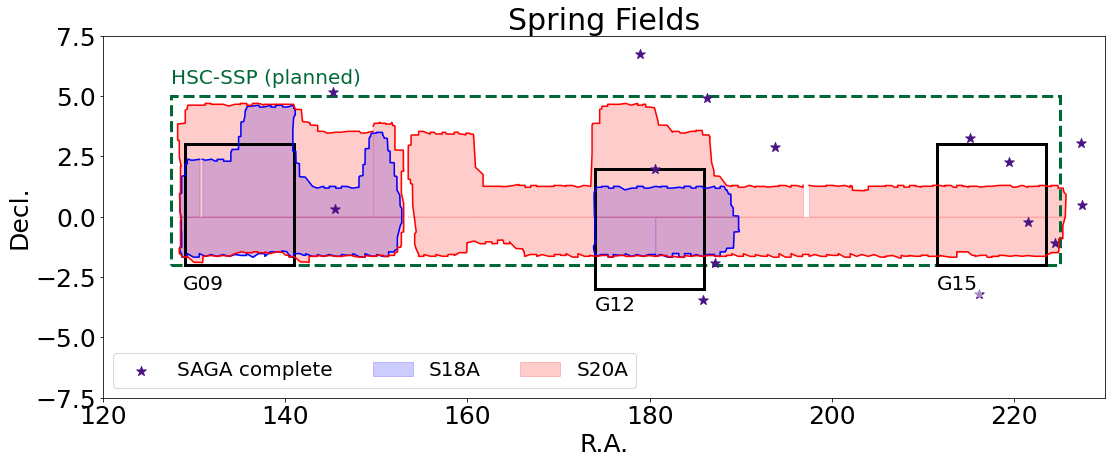

In [316]:
fig = plt.figure(1, figsize=(16,7))
plt.xlabel('R.A.')
plt.ylabel('Decl.')

# HSC-SSP original fields
hscssp_fall1 = patches.Rectangle((330,-1.0),width=30, height=8,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')#, label='HSC-SSP (planned)')
plt.gca().add_patch(hscssp_fall1)
hscssp_fall2 = patches.Rectangle((0,-1.0),width=40, height=8,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_fall2)
hscssp_fall3 = patches.Rectangle((27.5,-7.0),width=12.5, height=6,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_fall3)
hscssp_spring = patches.Rectangle((127.5,-2.0),width=97.5, height=7,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_spring)
plt.text(127.5,5.5,'HSC-SSP (planned)', fontsize=20, color='#006837')

# SAGA
plt.scatter(ra_saga_complete,dec_saga_complete, s=100, marker='*', color='#4a1486', zorder=20, label='SAGA complete')
# plt.scatter(ra_saga_notcomplete,dec_saga_notcomplete, s=100, marker='*', color='#dd1c77', zorder=20, label='SAGA not complete')

ra_saga_complete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]>0]
dec_saga_complete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]>0]

ra_saga_notcomplete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]<1]
dec_saga_notcomplete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]<1]

#S18A
plt.plot(gama_edges1_S18A[:,0],gama_edges1_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges1_S18A[:,0],gama_edges1_S18A[:,1], color='b', alpha=0.2, label='S18A')
plt.plot(gama_edges2_S18A[:,0],gama_edges2_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges2_S18A[:,0],gama_edges2_S18A[:,1], color='b', alpha=0.2)
plt.plot(gama_edges3_S18A[:,0],gama_edges3_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges3_S18A[:,0],gama_edges3_S18A[:,1], color='b', alpha=0.2)
plt.plot(gama_edges4_S18A[:,0],gama_edges4_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges4_S18A[:,0],gama_edges4_S18A[:,1], color='b', alpha=0.2)
plt.plot(gama_edges5_S18A[:,0],gama_edges5_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges5_S18A[:,0],gama_edges5_S18A[:,1], color='b', alpha=0.2)

#S20A
plt.plot(gama_edges1[:,0],gama_edges1[:,1], zorder=100,color='r')
plt.fill_between(gama_edges1[:,0],gama_edges1[:,1], color='r', alpha=0.2, label='S20A')
plt.plot(gama_edges2[:,0],gama_edges2[:,1], zorder=100,color='r')
plt.fill_between(gama_edges2[:,0],gama_edges2[:,1], color='r', alpha=0.2)
plt.plot(gama_edges3[:,0],gama_edges3[:,1], zorder=100,color='r')
plt.fill_between(gama_edges3[:,0],gama_edges3[:,1], color='r', alpha=0.2)
plt.plot(gama_edges4[:,0],gama_edges4[:,1], zorder=100,color='r')
plt.fill_between(gama_edges4[:,0],gama_edges4[:,1], color='r', alpha=0.2)
plt.plot(gama_edges5[:,0],gama_edges5[:,1], zorder=100,color='r')
plt.fill_between(gama_edges5[:,0],gama_edges5[:,1], color='r', alpha=0.2)


# # GAMA02
# g02 = patches.Rectangle((30.2,-10.25),width=38.8-30.2, height=10.25-3.72,linewidth=2,edgecolor='k',facecolor='none')
# plt.gca().add_patch(g02)
# plt.text(29.5,-11.5, 'G02', fontsize=15)

# GAMA09
g09 = patches.Rectangle((129.0,-2.0),width=12, height=5,linewidth=3,edgecolor='k',facecolor='none')
plt.gca().add_patch(g09)
plt.text(128.8,-3.0, 'G09', fontsize=20)

# GAMA12
g12 = patches.Rectangle((174.0,-3.0),width=12, height=5,linewidth=3,edgecolor='k',facecolor='none')
plt.gca().add_patch(g12)
plt.text(174.0,-3.9, 'G12', fontsize=20)

# GAMA15
g15 = patches.Rectangle((211.5,-2.0),width=12, height=5,linewidth=3,edgecolor='k',facecolor='none')
plt.gca().add_patch(g15)
plt.text(211.5,-3.0, 'G15', fontsize=20,bbox=dict(facecolor='white', alpha=0.5, edgecolor='None'), zorder=200)

plt.xlim(120,230)
plt.ylim(-7.5,7.5)
plt.legend(loc='lower left', fontsize=20, ncol=3)

plt.title('Spring Fields')

plt.tight_layout ()
plt.savefig('../figures/springfields.pdf', bbox_inches='tight')



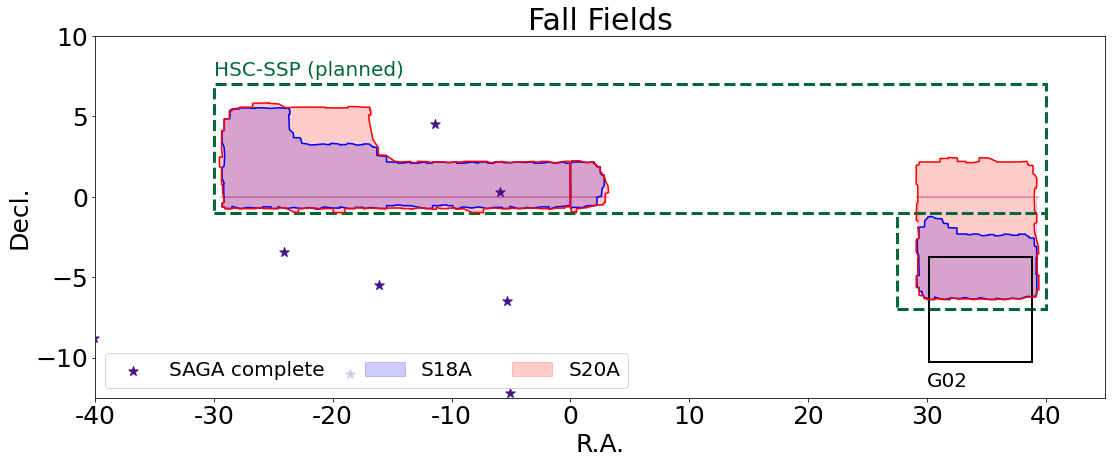

In [366]:
fig = plt.figure(1, figsize=(16,7))
plt.xlabel('R.A.')
plt.ylabel('Decl.')

# HSC-SSP original fields
hscssp_fall1 = patches.Rectangle((330,-1.0),width=70, height=8,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')#, label='HSC-SSP (planned)')
plt.gca().add_patch(hscssp_fall1)
# hscssp_fall2 = patches.Rectangle((0,-1.0),width=40, height=8,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')
# plt.gca().add_patch(hscssp_fall2)
hscssp_fall3 = patches.Rectangle((387.5
,-7.0),width=12.5, height=6,linewidth=3,edgecolor='#006837',facecolor='none', ls='--')
plt.gca().add_patch(hscssp_fall3)
plt.text(330,7.5,'HSC-SSP (planned)', fontsize=20, color='#006837')

# SAGA
plt.scatter(ra_saga_complete,dec_saga_complete, s=100, marker='*', color='#4a1486', zorder=20, label='SAGA complete')
# plt.scatter(ra_saga_notcomplete,dec_saga_notcomplete, s=100, marker='*', color='#dd1c77', zorder=20, label='SAGA not complete')

ra_saga_complete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]>0]
dec_saga_complete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]>0]

ra_saga_notcomplete = [ra_saga[i] for i in range(len(ra_saga)) if complete[i]<1]
dec_saga_notcomplete = [dec_saga[i] for i in range(len(dec_saga)) if complete[i]<1]

#S18A
plt.plot(gama_edges1_S18A[:,0]+360,gama_edges1_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges1_S18A[:,0]+360,gama_edges1_S18A[:,1], color='b', alpha=0.2, label='S18A')
plt.plot(gama_edges2_S18A[:,0]+360,gama_edges2_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges2_S18A[:,0]+360,gama_edges2_S18A[:,1], color='b', alpha=0.2)
plt.plot(gama_edges3_S18A[:,0],gama_edges3_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges3_S18A[:,0],gama_edges3_S18A[:,1], color='b', alpha=0.2)
plt.plot(gama_edges4_S18A[:,0],gama_edges4_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges4_S18A[:,0],gama_edges4_S18A[:,1], color='b', alpha=0.2)
plt.plot(gama_edges5_S18A[:,0],gama_edges5_S18A[:,1], zorder=100,color='b')
plt.fill_between(gama_edges5_S18A[:,0],gama_edges5_S18A[:,1], color='b', alpha=0.2)

#S20A
plt.plot(gama_edges1[:,0]+360,gama_edges1[:,1], zorder=100,color='r')
plt.fill_between(gama_edges1[:,0]+360,gama_edges1[:,1], color='r', alpha=0.2, label='S20A')
plt.plot(gama_edges2[:,0]+360,gama_edges2[:,1], zorder=100,color='r')
plt.fill_between(gama_edges2[:,0]+360,gama_edges2[:,1], color='r', alpha=0.2)
plt.plot(gama_edges3[:,0],gama_edges3[:,1], zorder=100,color='r')
plt.fill_between(gama_edges3[:,0],gama_edges3[:,1], color='r', alpha=0.2)
plt.plot(gama_edges4[:,0],gama_edges4[:,1], zorder=100,color='r')
plt.fill_between(gama_edges4[:,0],gama_edges4[:,1], color='r', alpha=0.2)
plt.plot(gama_edges5[:,0],gama_edges5[:,1], zorder=100,color='r')
plt.fill_between(gama_edges5[:,0],gama_edges5[:,1], color='r', alpha=0.2)


# GAMA02
g02 = patches.Rectangle((30.2+360,-10.25),width=38.8-30.2, height=10.25-3.72,linewidth=2,edgecolor='k',facecolor='none')
plt.gca().add_patch(g02)
plt.text(390.,-11.8, 'G02', fontsize=20)

plt.xlim(320,405)
plt.ylim(-12.5,10)
plt.legend(loc='lower left', fontsize=20, ncol=3, fancybox=True, facecolor='white', framealpha=0.8).set_zorder(102)

xticks_values = ['-40','-30', '-20','-10', '0','10', '20', '30', '40']
plt.xticks([320,330,340,350,360,370,380,390,400], xticks_values)



plt.title('Fall Fields')

plt.tight_layout ()
plt.savefig('../figures/fallfields.pdf', bbox_inches='tight')

